In [1]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data File
df = pd.read_csv('cleveland_heartdisease_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
63.0     302 non-null float64
1.0      302 non-null float64
1.0.1    302 non-null float64
145.0    302 non-null float64
233.0    302 non-null float64
1.0.2    302 non-null float64
2.0      302 non-null float64
150.0    302 non-null float64
0.0      302 non-null float64
2.3      302 non-null float64
3.0      302 non-null float64
0.0.1    302 non-null object
6.0      302 non-null object
0        302 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [5]:
df.describe()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
# Renaming The Column Names

my_columns = ["age" , "sex ", "cp" , "trestbps" , "chol" , "fbs" ,
              "restecg" , "thalach" , "exang" , "oldpeak" , "slope" , 
              "ca" , "thal" , "num"]
df.columns = my_columns

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
age         302 non-null float64
sex         302 non-null float64
cp          302 non-null float64
trestbps    302 non-null float64
chol        302 non-null float64
fbs         302 non-null float64
restecg     302 non-null float64
thalach     302 non-null float64
exang       302 non-null float64
oldpeak     302 non-null float64
slope       302 non-null float64
ca          302 non-null object
thal        302 non-null object
num         302 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(302, 14)

In [13]:
df.size

4228

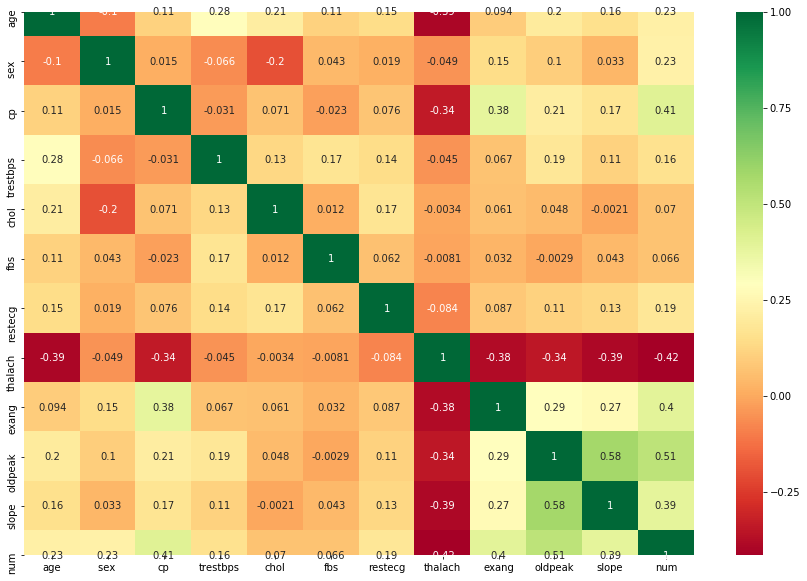

In [14]:
# Checcking With correlation matrix and representing on Heat Map

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,vmax=1.0,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E094C639C8>,
      dtype=object)

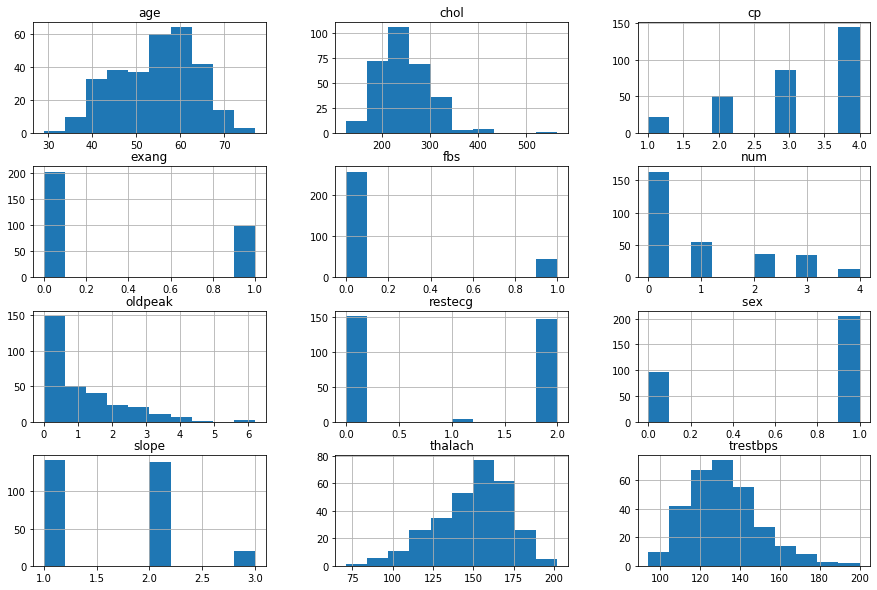

In [15]:
df.hist(figsize=(15,10))

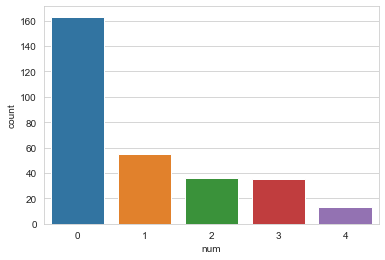

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='num',data=df)

In [68]:
dataset=pd.get_dummies(df,columns =['age','cp','fbs','restecg','exang','slope','ca','thal'])

In [69]:
data_hb_exchange = df[['thalach','exang','num','age']]

In [78]:
# Fitting Train_Test
from sklearn.model_selection import train_test_split

predictors = dataset.drop("num",axis = 1)
target = dataset["num"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [79]:
X_train.shape

(241, 69)

In [80]:
X_test.shape

(61, 69)

In [81]:
Y_train.shape

(241,)

In [82]:
Y_test.shape

(61,)

In [83]:
df.num

0      2
1      1
2      0
3      0
4      0
      ..
297    1
298    2
299    3
300    1
301    0
Name: num, Length: 302, dtype: int64

# Checking Accuracy Scores with algorithms

In [84]:
# Logistic_Regression

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Lreg=LogisticRegression()
Lreg.fit(X_train,Y_train)
Y_pred_Lreg = Lreg.predict(X_test)

In [85]:
Y_pred_Lreg.shape

(61,)

In [86]:
score_Lreg = round(accuracy_score(Y_pred_Lreg,Y_test)*100,2)
print("The Accuracy Score By Logistic Regression is :"+str(score_Lreg)+"%")

The Accuracy Score By Logistic Regression is :52.46%


In [98]:
# SVM

from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train,Y_train)
Y_pred_svm = sv.predict(X_test)

In [100]:
Y_pred_svm.shape

(61,)

In [99]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The Accuracy Score By Linear SVM is :"+str(score_svm)+"%")

The Accuracy Score By Linear SVM is :50.82%


In [104]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)

In [105]:
Y_pred_nb.shape

(61,)

In [106]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The Accuracy Score By Naive Bayes is :"+str(score_nb)+"%")

The Accuracy Score By Naive Bayes is :9.84%


In [87]:
#Using K_Neighbors Classifier

from sklearn.model_selection import cross_val_score

knn_scores =[]
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for Different Values of K')

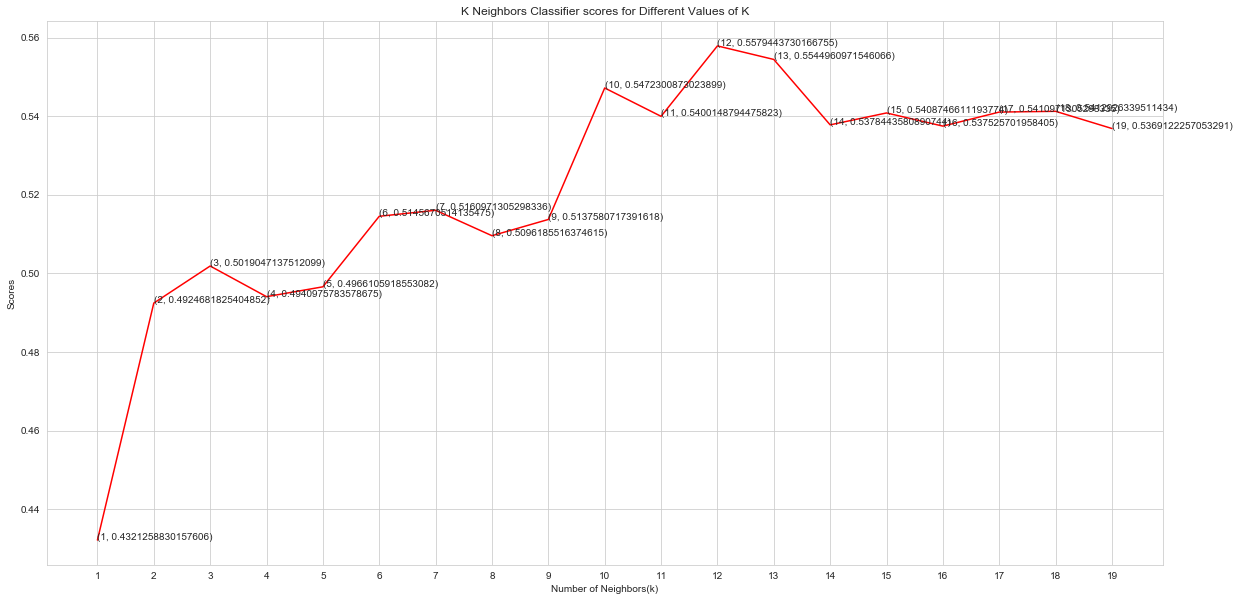

In [50]:
plt.figure(figsize = (20,10))
plt.plot([k for k in range(1,20)], knn_scores, color='red')
for i in range(1,20):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,20)])
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for Different Values of K')

In [52]:
knn_scores

[0.4321258830157606,
 0.4924681825404852,
 0.5019047137512099,
 0.4940975783578675,
 0.4966105918553082,
 0.5145670514135475,
 0.5160971305298336,
 0.5096185516374615,
 0.5137580717391618,
 0.5472300873023899,
 0.5400148794475823,
 0.5579443730166755,
 0.5544960971546066,
 0.5378443580890744,
 0.5408746611193774,
 0.537525701958405,
 0.5410971305298335,
 0.5412926339511434,
 0.5369122257053291]

In [59]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [60]:
score.mean()

0.5579443730166755

In [107]:
# Accuracy Score of KNN

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [108]:
Y_pred_knn.shape

(61,)

In [109]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The Accuracy Score By KNN is :"+str(score_knn)+"%")

The Accuracy Score By KNN is :47.54%


In [110]:
#Random_Forest_Classifier

rf_c = RandomForestClassifier(n_estimators = 12)
score=cross_val_score(rf_c,X,y,cv=10)

In [111]:
score.mean()

0.5816881672276555

In [119]:
# AccuracyScore of RFC
        
rf_c= RandomForestClassifier(random_state=x)
rf_c.fit(X_train,Y_train)
Y_pred_rf_c = rf_c.predict(X_test)

In [120]:
Y_pred_rf_c.shape

(61,)

In [121]:
score_rf_c = round(accuracy_score(Y_pred_rf_c,Y_test)*100,2)
print("The Accuracy Score By RFC is :"+str(score_rf_c)+"%")

The Accuracy Score By RFC is :63.93%


In [124]:
# BY Decision Tree

max_accuracy = 0
for x in range(100):
    dt= DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x


In [125]:
Y_pred_dt.shape

(61,)

In [126]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The Accuracy Score By DTC is :"+str(score_dt)+"%")

The Accuracy Score By DTC is :50.82%


In [130]:
# Conclusion

scores = [score_Lreg,score_svm,score_nb,score_knn,score_rf_c,score_dt]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","K_Nearest Neighbors","Random Forest","Decision Tree"]
for i in range(len(algorithms)):
    print("The Accuracy Score Acieved Using "+algorithms[i]+" is: "+str(scores[i])+"%")

The Accuracy Score Acieved Using Logistic Regression is: 52.46%
The Accuracy Score Acieved Using Support Vector Machine is: 50.82%
The Accuracy Score Acieved Using Naive Bayes is: 9.84%
The Accuracy Score Acieved Using K_Nearest Neighbors is: 47.54%
The Accuracy Score Acieved Using Random Forest is: 63.93%
The Accuracy Score Acieved Using Decision Tree is: 50.82%


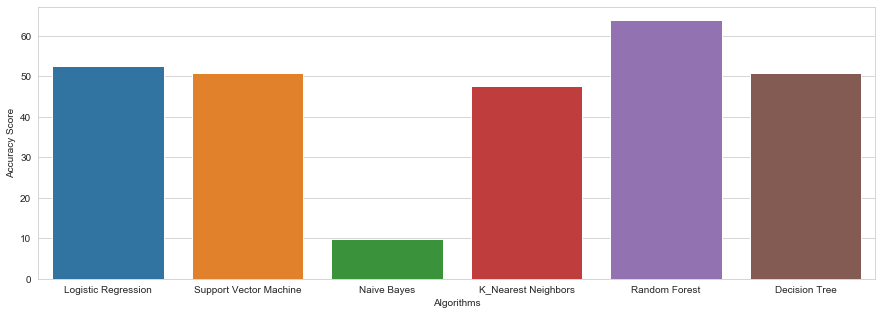

In [134]:
# Representing Through Bar Graph

plt.figure(figsize=(15,5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms,scores)

# Hence Random Forest Classifier suits as best model when compared with other algorithms